In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
df1=pd.read_csv('/content/tips.csv')

In [3]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df1.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
df1.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df1.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df1['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
df1.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [11]:
for i in df1.columns:
    print(df1[i].unique())

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10.59 10.63 50.8

In [12]:
a=pd.DataFrame(df1['day'].value_counts())
a.reset_index(inplace=True)


<BarContainer object of 4 artists>

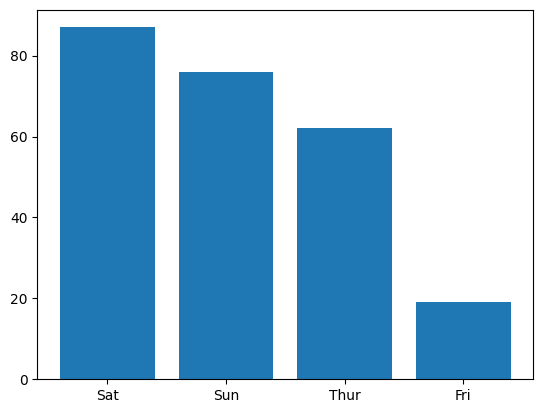

In [13]:
plt.bar(a['index'],a['day'])

<BarContainer object of 4 artists>

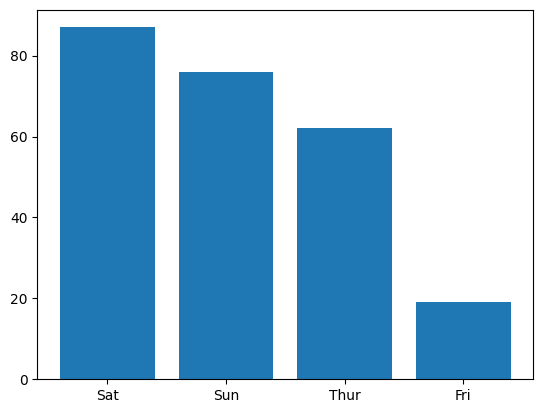

In [14]:
plt.bar(df1['day'].value_counts().index,df1['day'].value_counts().values)

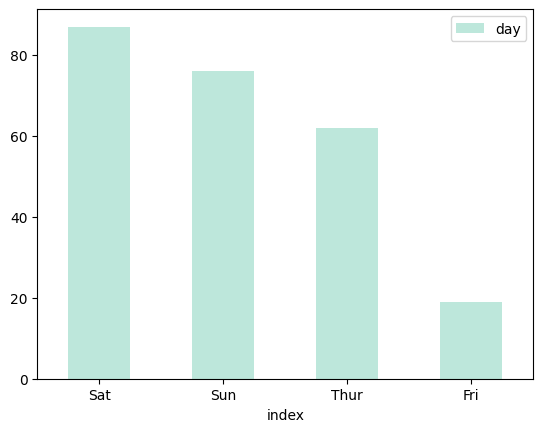

In [15]:
a.plot(kind='bar',x='index',y='day',colormap='icefire')
plt.xticks(rotation=0)
plt.show()

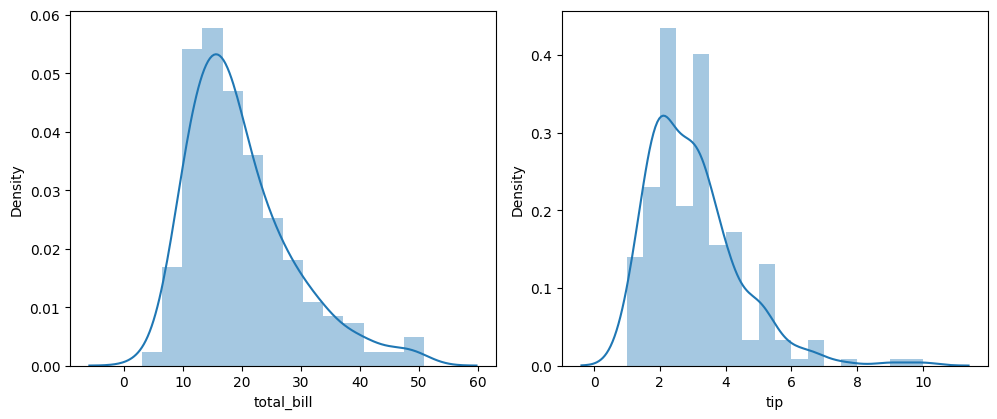

In [99]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.distplot(df1[col])
plt.tight_layout()
plt.show()


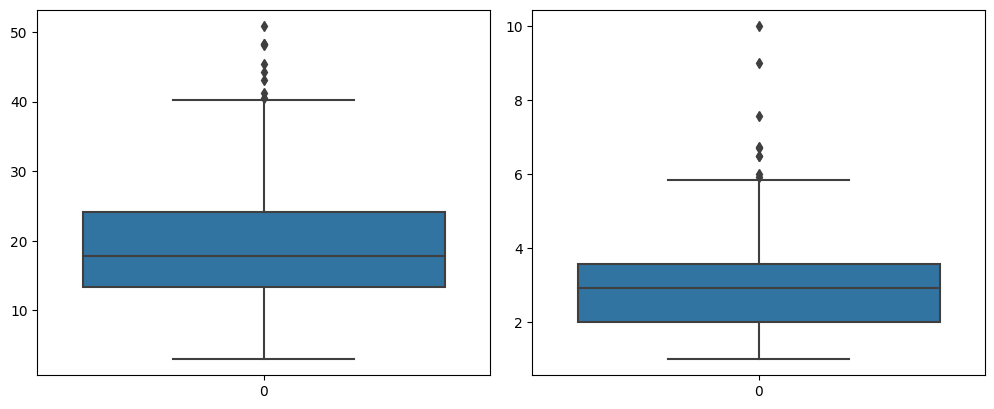

In [100]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.boxplot(df1[col])
plt.tight_layout()
plt.show()


In [107]:
df1.shape, df1[(df1['total_bill']<45) & (df1['tip']<7)].shape


((238, 13), (238, 13))

In [103]:
df1 = df1[(df1['total_bill']<45) & (df1['tip']<7)]


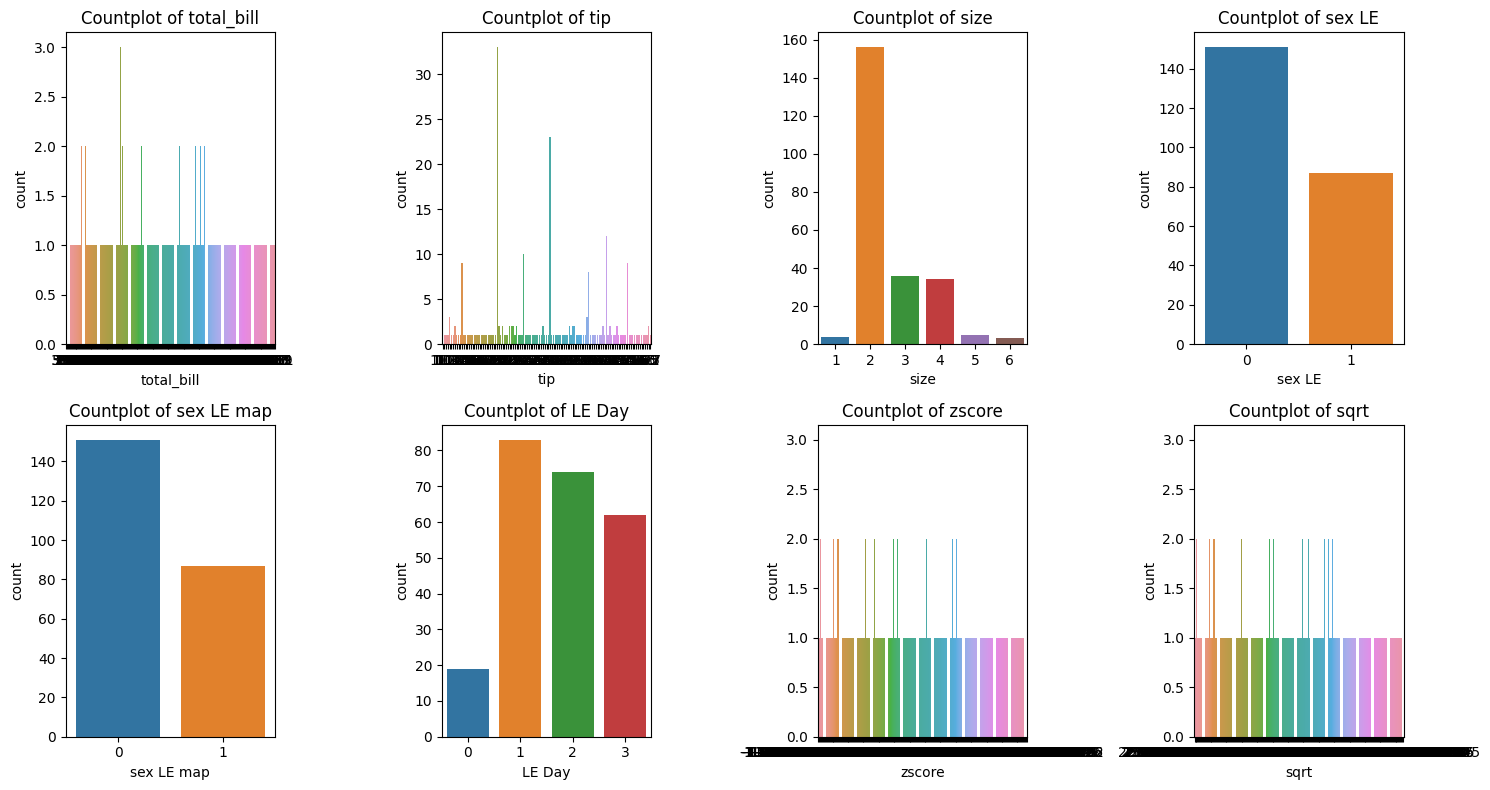

In [106]:
import matplotlib.pyplot as plt
import seaborn as sb

feat = df1.select_dtypes(include=['int', 'float']).columns

# Create subplots for countplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(feat):
    if i < 8:
        plt.subplot(2, 4, i + 1)
        sb.countplot(data=df1, x=col)
        plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


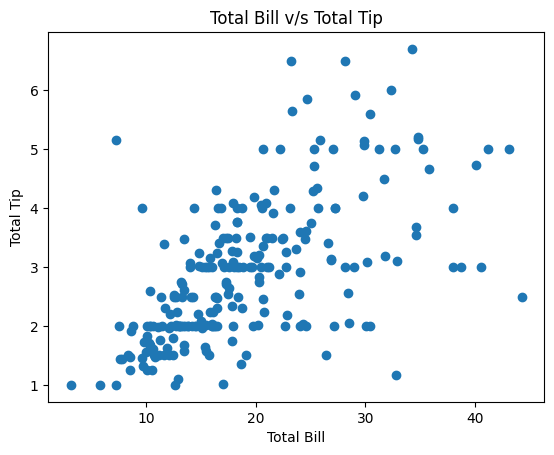

In [109]:
plt.scatter(df1['total_bill'], df1['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()


In [111]:
df1.groupby(['size']).mean()


,total_bill,tip,sex LE,sex LE map,LE Day,zscore,sqrt,log
size,,,,,,,,
1,7.242500,1.437500,0.750000,0.750000,1.250000,-1.408994,2.636803,1.890418
2,16.448013,2.582308,0.371795,0.371795,1.762821,-0.374947,3.992982,2.738300
3,21.899722,3.206667,0.388889,0.388889,1.583333,0.237439,4.618495,3.034306
4,27.137647,3.814706,0.264706,0.264706,1.794118,0.825810,5.165959,3.267425
5,30.068000,4.028000,0.200000,0.200000,2.000000,1.154974,5.450960,3.379599
6,30.383333,5.300000,0.666667,0.666667,3.000000,1.190395,5.505506,3.409114


In [112]:
df1.groupby(['time']).mean()


,total_bill,tip,size,sex LE,sex LE map,LE Day,zscore,sqrt,log
time,,,,,,,,,
Dinner,19.882059,2.966235,2.582353,0.305882,0.305882,1.376471,0.010797,4.372961,2.909426
Lunch,17.168676,2.728088,2.411765,0.514706,0.514706,2.691176,-0.293995,4.054834,2.758631


In [113]:
df1.groupby(['day']).mean()


,total_bill,tip,size,sex LE,sex LE map,LE Day,zscore,sqrt,log
day,,,,,,,,,
Fri,17.151579,2.734737,2.105263,0.473684,0.473684,0.0,-0.295916,4.037704,2.740803
Sat,19.175542,2.736024,2.457831,0.337349,0.337349,1.0,-0.068566,4.294597,2.872894
Sun,20.724865,3.228243,2.797297,0.243243,0.243243,2.0,0.105468,4.470978,2.957533
Thur,17.682742,2.771452,2.451613,0.516129,0.516129,3.0,-0.236251,4.114707,2.787200


In [115]:
le = LabelEncoder()

for col in df1.columns:
  if df1[col].dtype == object:
	  df1[col] = le.fit_transform(df1[col])

df1.head()


,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map,LE Day,zscore,sqrt,log
0,16.99,1.01,0,0,2,0,2,1,1,2,-0.314066,4.121893,2.832625
1,10.34,1.66,1,0,2,0,3,0,0,2,-1.061054,3.215587,2.336020
2,21.01,3.50,1,0,2,0,3,0,0,2,0.137497,4.583667,3.044999
3,23.68,3.31,1,0,2,0,2,0,0,2,0.437416,4.866210,3.164631
4,24.59,3.61,0,0,2,0,4,1,1,2,0.539635,4.958831,3.202340


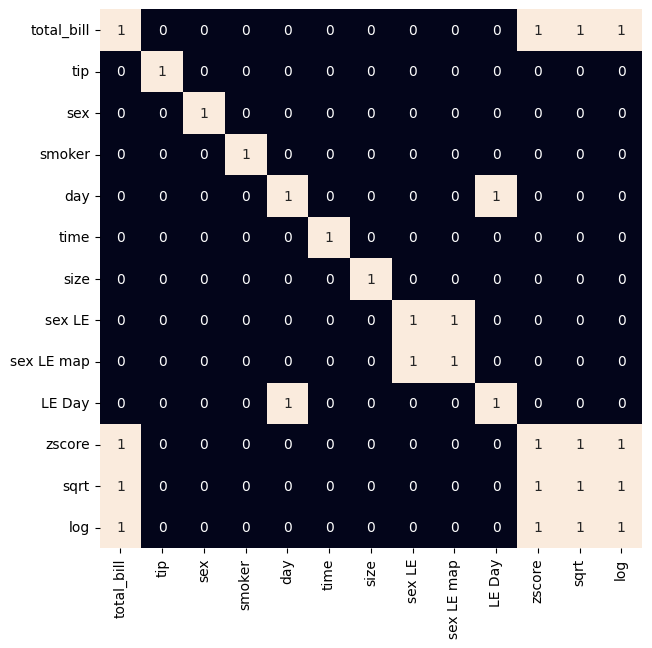

In [117]:
plt.figure(figsize=(7,7))
sb.heatmap(df1.corr() > 0.7, annot = True, cbar = False)
plt.show()


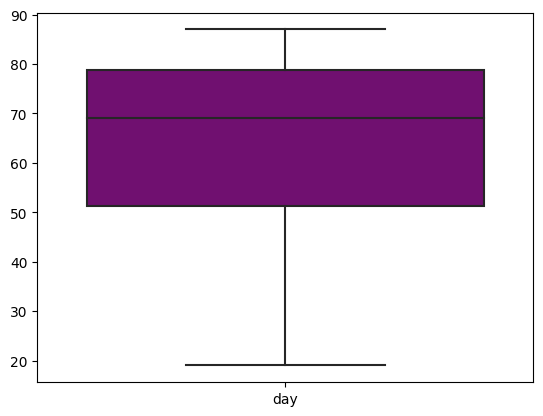

In [17]:
sns.boxplot(a,color='Purple')
plt.show()

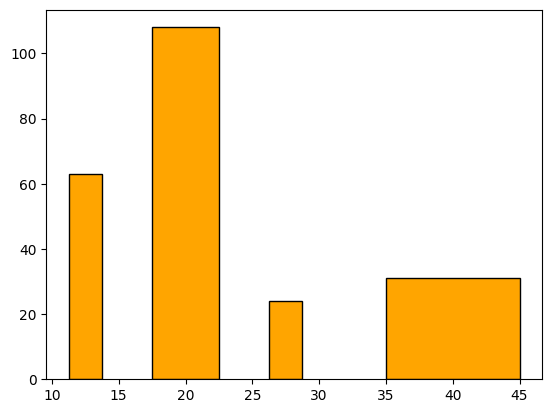

In [18]:
plt.hist(df1['total_bill'],color='orange',bins=[10,15,25,30,50],edgecolor='black',rwidth=0.5)
plt.show()

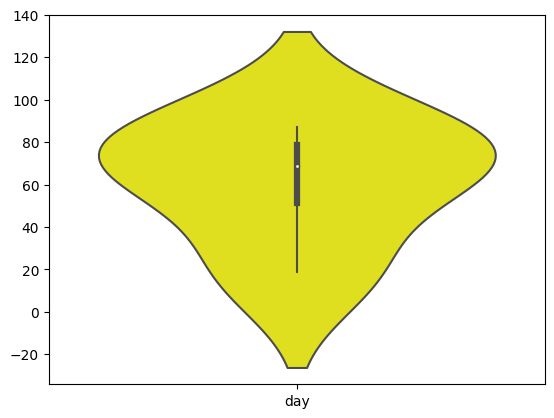

In [19]:
sns.violinplot(a,color='Yellow')
plt.show()

In [20]:
a.kurt()

<ipython-input-20-57552327a8b4>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.kurt()


day    1.776551
dtype: float64

In [21]:
a.skew()

<ipython-input-21-a03ba72f05af>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.skew()


day   -1.337178
dtype: float64

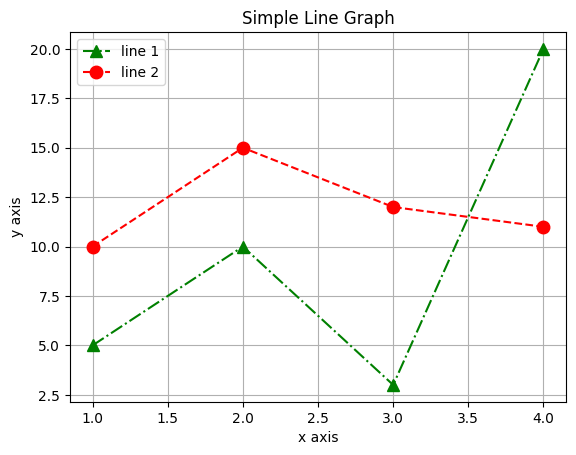

In [22]:
x1=[1,2,3,4]
y1=[5,10,3,20]
x2=[10,15,12,11]
plt.plot(x1,y1,linestyle='-.',marker='^',markersize=9,color='green',label='line 1')
plt.plot(x1,x2,linestyle='--',marker='o',markersize=9,color='red',label='line 2')
plt.title('Simple Line Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.grid()
plt.show()

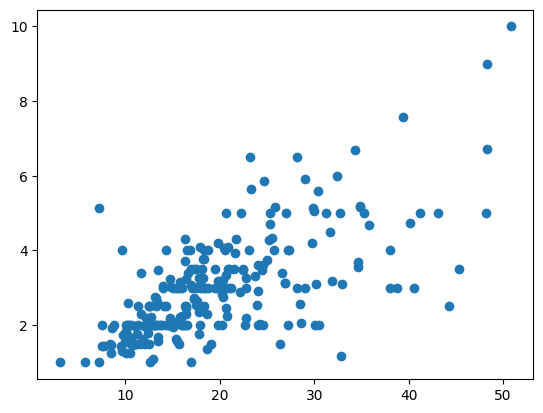

In [23]:
plt.scatter(df1['total_bill'],df1['tip'])
plt.show()

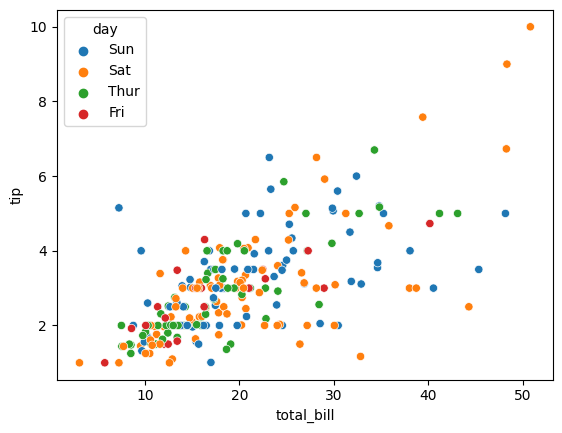

In [24]:
sns.scatterplot(x='total_bill',y='tip',data=df1,hue='day')
plt.show()

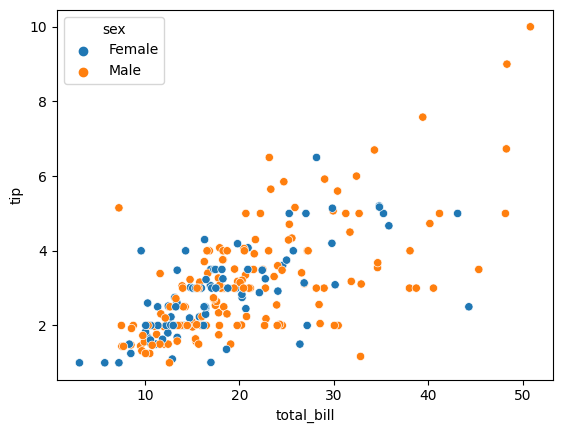

In [25]:
sns.scatterplot(x='total_bill',y='tip',data=df1,hue='sex')
plt.show()

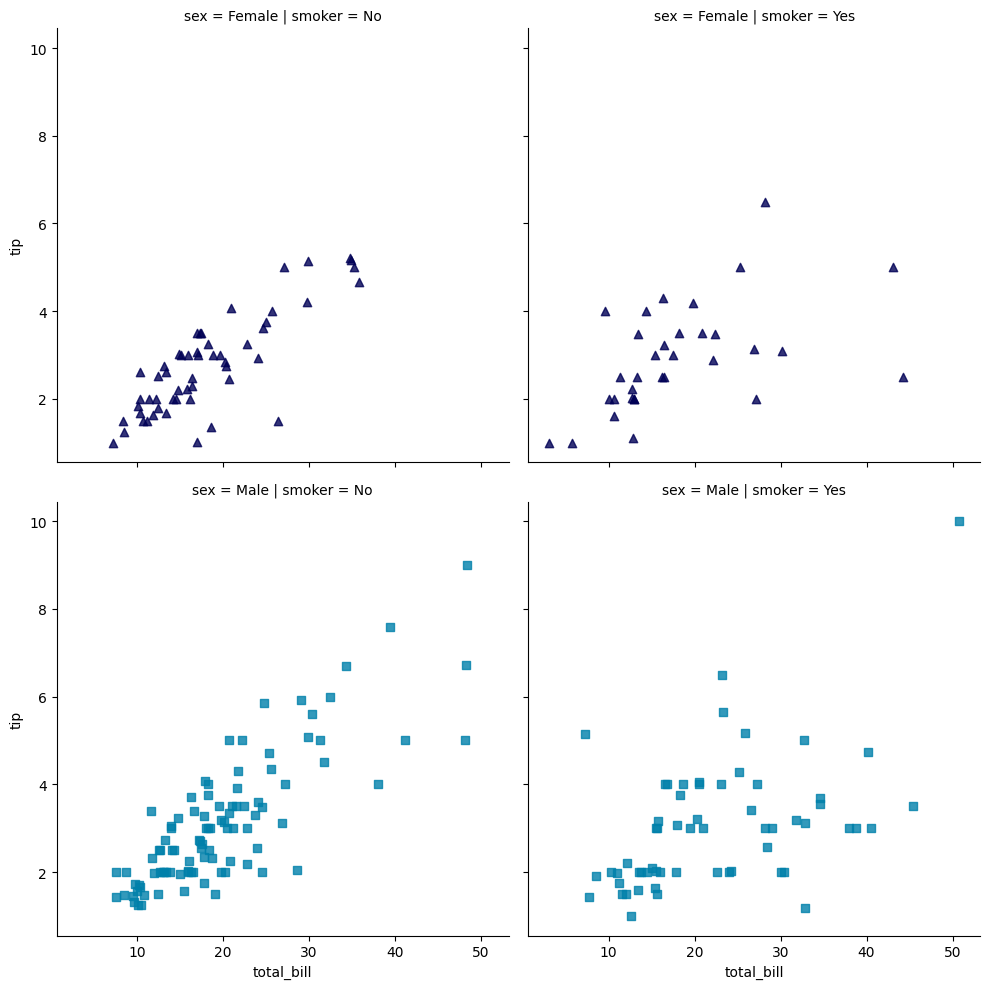

In [26]:
sns.lmplot(x='total_bill',y='tip',data=df1,hue='sex',fit_reg=False,markers=['^','s'],palette='ocean',row='sex',col='smoker')
# col and row only for LM plot
plt.show()

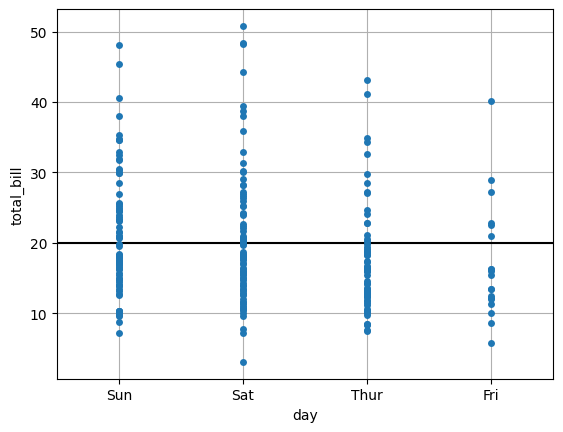

In [27]:
sns.stripplot(x='day',y='total_bill',data=df1,jitter=False)
plt.grid()
plt.axhline(20,color='black')
plt.show()

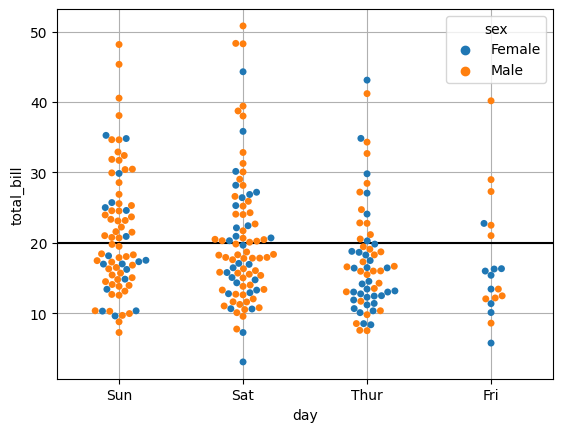

In [28]:
sns.swarmplot(x='day',y='total_bill',data=df1,hue='sex')
plt.grid()
plt.axhline(20,color='black')
plt.show()

<ipython-input-29-6c727b10daad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


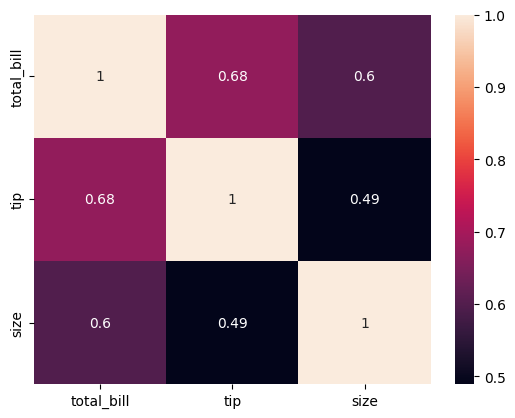

<Figure size 500x500 with 0 Axes>

In [29]:
sns.heatmap(df1.corr(),annot=True)
plt.figure(figsize=(5,5))
plt.show()

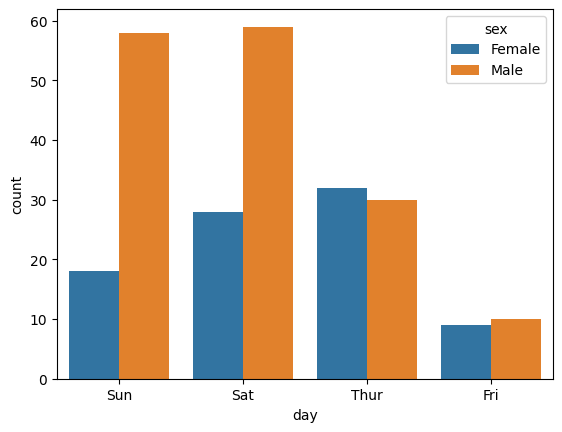

In [30]:
sns.countplot(x='day',data=df1,hue='sex')
plt.show()

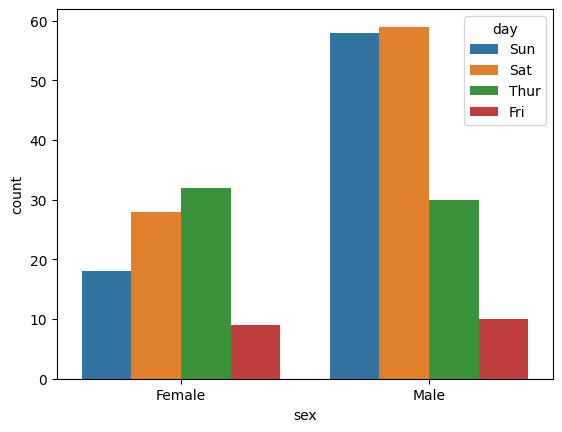

In [31]:
sns.countplot(x='sex',data=df1,hue='day')
plt.show()

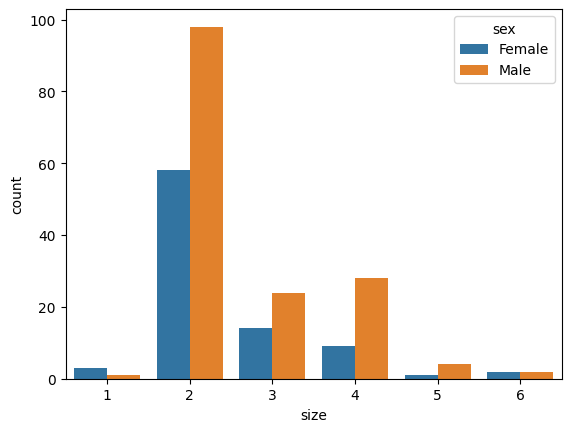

In [32]:
sns.countplot(x='size',data=df1,hue='sex')
plt.show()

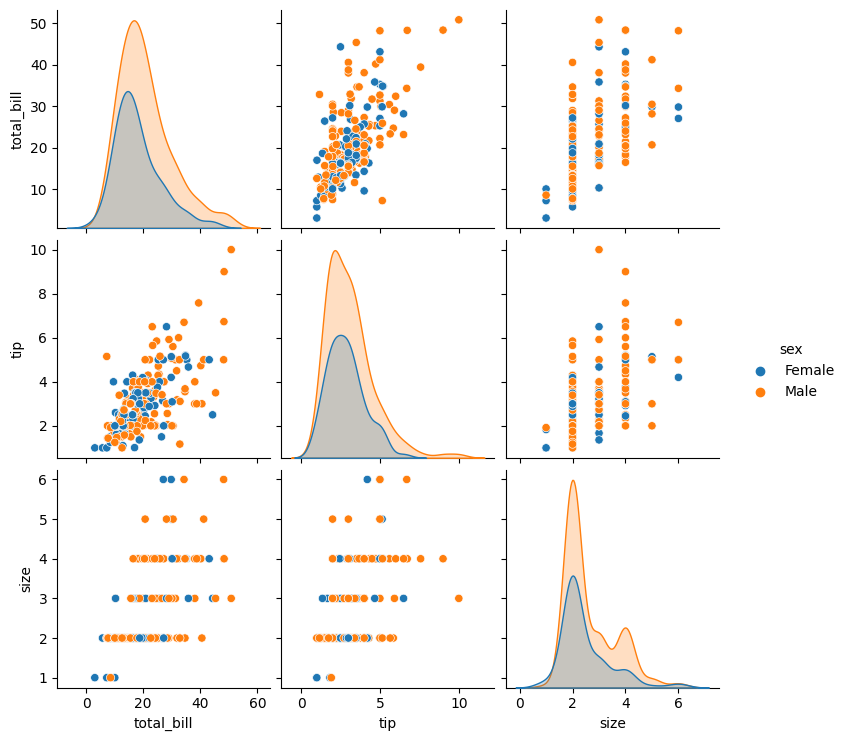

In [33]:
sns.pairplot(data=df1,hue='sex')
plt.show()

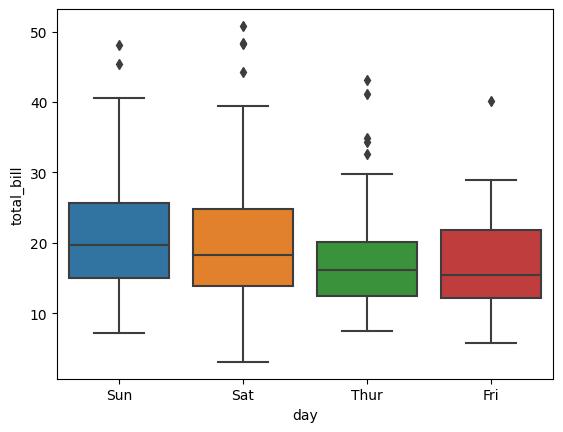

In [34]:
sns.boxplot(x='day',y='total_bill',data=df1)
plt.show()

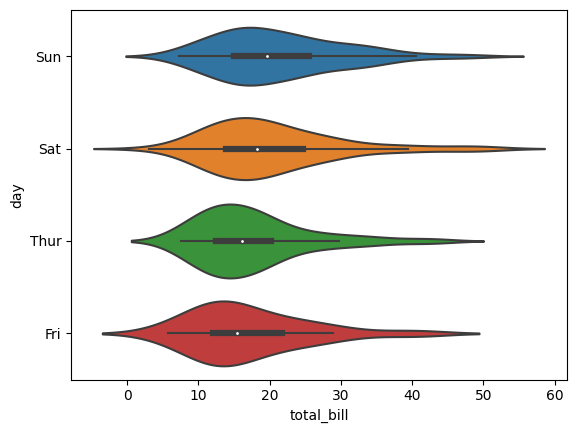

In [35]:
sns.violinplot(y='day',x='total_bill',data=df1)
plt.show()

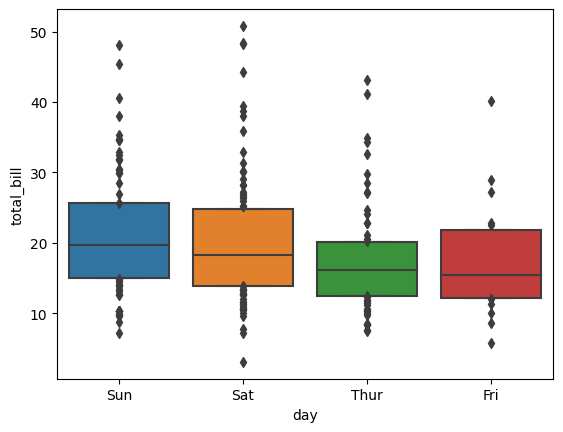

In [36]:
sns.boxplot(x='day',y='total_bill',data=df1,whis=False)
plt.show()

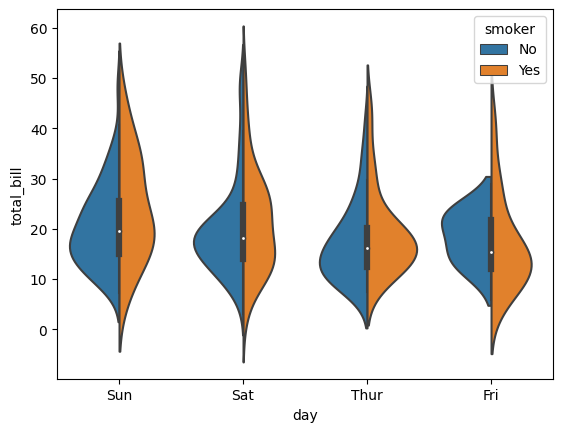

In [37]:
sns.violinplot(x='day',y='total_bill',data=df1,hue='smoker',split=True)
plt.show()

In [38]:
a=df1.groupby('sex').mean()['total_bill']

<ipython-input-38-244995ccd819>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=df1.groupby('sex').mean()['total_bill']


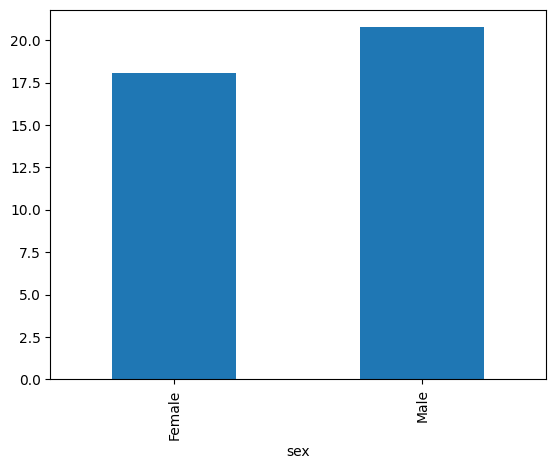

In [39]:
a.plot(kind='bar')
plt.show()

<ipython-input-40-d3dae3c0b634>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('day').mean()['total_bill'].plot(kind='bar')


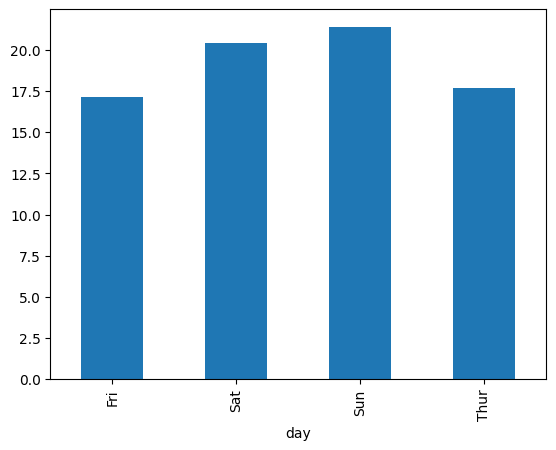

In [40]:
df1.groupby('day').mean()['total_bill'].plot(kind='bar')
plt.show()

In [41]:
x=pd.DataFrame(pd.pivot_table(df1,index=['sex','smoker'],aggfunc='count')['total_bill'])

In [42]:
x

total_bill
sex    smoker            
Female No              54
       Yes             33
Male   No              97
       Yes             60

In [43]:
x.loc['Female','Yes'].sum()/x.loc['Female'].sum()*100

total_bill    37.931034
dtype: float64

In [44]:
x.loc['Female','No'].sum()/x.loc['Female'].sum()*100

total_bill    62.068966
dtype: float64

In [45]:
df1['smoker'][df1['sex']=='Female'].value_counts(normalize=True)*100

No     62.068966
Yes    37.931034
Name: smoker, dtype: float64

In [46]:
df1[(df1['sex']=='Female') & (df1['smoker']=='Yes')]['sex'].value_counts()

Female    33
Name: sex, dtype: int64

- percentage of females who smoke and don't smoke of the total number of females

In [47]:
(x.loc['Female','Yes'].sum()/(x.loc['Female','Yes'].sum()+x.loc['Male','Yes'].sum()))*100

35.483870967741936

In [48]:
(x.loc['Male','Yes'].sum()/(x.loc['Female','Yes'].sum()+x.loc['Male','Yes'].sum()))*100

64.51612903225806

In [49]:
print((df1.groupby(['day','smoker']).count()['total_bill']['Thur','Yes']/df1.groupby(['day','smoker']).count()['total_bill']['Thur'].sum())*100)

27.419354838709676


In [50]:
print((df1.groupby(['day','smoker']).count()['total_bill']['Fri','Yes']/df1.groupby(['day','smoker']).count()['total_bill']['Fri'].sum())*100)

78.94736842105263


In [51]:
print((df1.groupby(['day','smoker']).count()['total_bill']['Sat','Yes']/df1.groupby(['day','smoker']).count()['total_bill']['Sat'].sum())*100)
print((df1.groupby(['day','smoker']).count()['total_bill']['Sun','Yes']/df1.groupby(['day','smoker']).count()['total_bill']['Sun'].sum())*100)

48.275862068965516
25.0


In [52]:
print((df1.groupby(['day','smoker']).count()['total_bill']['Thur','No']/df1.groupby(['day','smoker']).count()['total_bill']['Thur'].sum())*100)
print((df1.groupby(['day','smoker']).count()['total_bill']['Fri','No']/df1.groupby(['day','smoker']).count()['total_bill']['Fri'].sum())*100)
print((df1.groupby(['day','smoker']).count()['total_bill']['Sat','No']/df1.groupby(['day','smoker']).count()['total_bill']['Sat'].sum())*100)
print((df1.groupby(['day','smoker']).count()['total_bill']['Sun','No']/df1.groupby(['day','smoker']).count()['total_bill']['Sun'].sum())*100)

72.58064516129032
21.052631578947366
51.724137931034484
75.0


In [53]:
(df1.groupby(['day','smoker']).count()['total_bill']/df1.groupby(['day']).count()['total_bill'])*100

day   smoker
Fri   No        21.052632
      Yes       78.947368
Sat   No        51.724138
      Yes       48.275862
Sun   No        75.000000
      Yes       25.000000
Thur  No        72.580645
      Yes       27.419355
Name: total_bill, dtype: float64

In [54]:
df1['sex LE']=df1['sex'].replace({'Male':0,'Female':1})#replace returns numerical value as int type
df1['sex LE map']=df1['sex'].map({'Male':0,'Female':1})# map returns numeric values as category type
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1


In [55]:
df1['sex LE map']=df1['sex LE map'].astype(np.int64)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   sex LE      244 non-null    int64  
 8   sex LE map  244 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 17.3+ KB


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lr=LabelEncoder()

In [59]:
df1['LE Day']=lr.fit_transform(df1['day'])

In [60]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map,LE Day
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,2


Outlier treatment

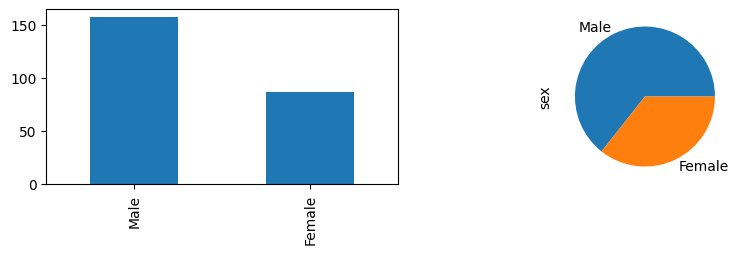

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
df1['sex'].value_counts().plot(kind='bar')
plt.subplot(2,2,2)
df1['sex'].value_counts().plot(kind='pie')
plt.show()

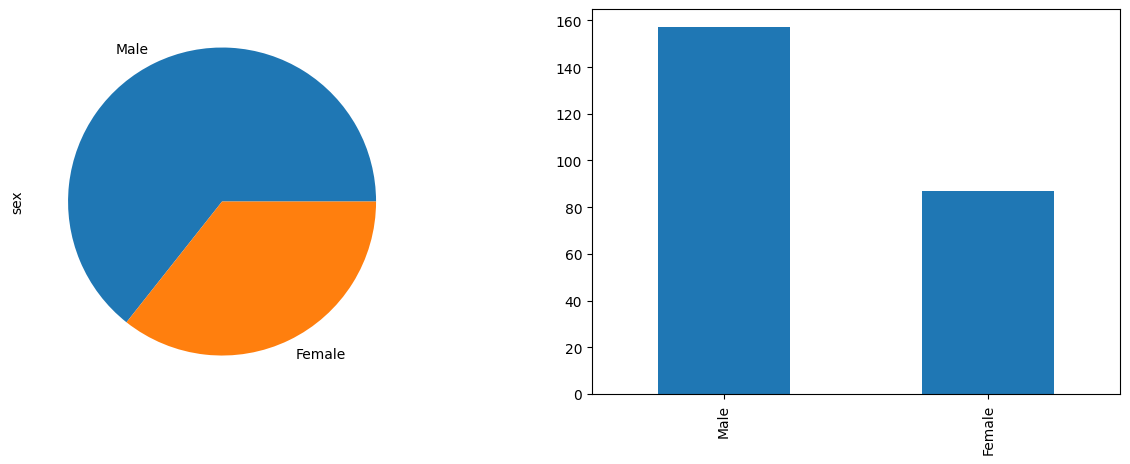

In [62]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
df1['sex'].value_counts().plot(kind='bar',ax=axes[1])
df1['sex'].value_counts().plot(kind='pie',ax=axes[0])
plt.show()

In [63]:
df1['zscore']=(df1['total_bill']-df1['total_bill'].mean())/df1['total_bill'].std()

In [64]:
df2=df1[(df1['zscore']>3) | (df1['zscore']<-3) ]
df2

,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map,LE Day,zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,0,0,1,3.199589
156,48.17,5.00,Male,No,Sun,Dinner,6,0,0,2,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0,0,1,3.484905
212,48.33,9.00,Male,No,Sat,Dinner,4,0,0,1,3.206329


In [65]:
df3=df1[(df1['zscore']<3) & (df1['zscore']>-3)]
df3

,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map,LE Day,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,2,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,2,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,2,0.539635
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0,1,1.038377
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1,1,0.830568
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0,1,0.323964
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0,1,-0.220833


In [66]:
df2['total_bill'].count()

4

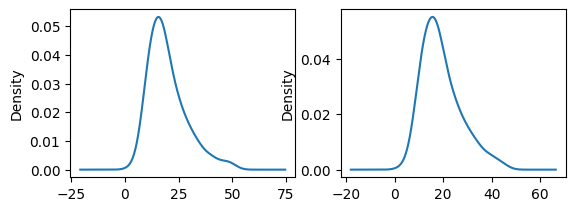

In [67]:
plt.subplot(2,2,1)
df1['total_bill'].plot(kind='kde')
plt.subplot(2,2,2)
df3['total_bill'].plot(kind='kde')
plt.show()

In [68]:
print(df1['total_bill'].skew())
print(df3['total_bill'].skew())

1.1332130376158205
0.9148510261489988


In [69]:
print(df1['total_bill'].kurt())
print(df3['total_bill'].kurt())

1.2184840156638854
0.5355590055930715


In [70]:
q1=df1['total_bill'].quantile(0.25)
q2=df1['total_bill'].quantile(0.5)
q3=df1['total_bill'].quantile(0.75)

In [71]:
IQR=q3-q1
IQR

10.779999999999998

In [72]:
UL=q3+(IQR)*(3/2)
UL

40.29749999999999

In [73]:
LL=q1-(IQR)*(3/2)
LL

-2.8224999999999945

In [74]:
df_out=df1[(df1['total_bill']>UL) | (df1['total_bill']<LL)]
df_out['total_bill'].count()

9

In [75]:
df_clean=df1[(df1['total_bill']<=UL) & (df1['total_bill']>=LL)]
df_clean.head()

,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map,LE Day,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,2,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,2,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,2,0.539635


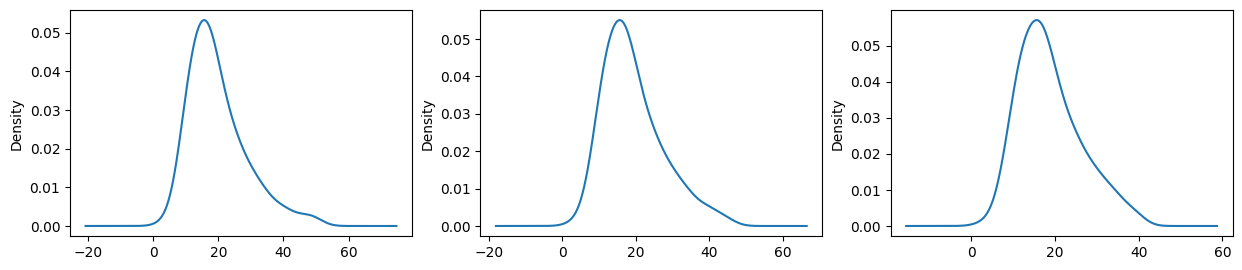

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df1['total_bill'].plot(kind='kde')
plt.subplot(3,3,2)
df3['total_bill'].plot(kind='kde')
plt.subplot(3,3,3)
df_clean['total_bill'].plot(kind='kde')
plt.show()

In [77]:
print('skew for all data is',df1['total_bill'].skew())
print('skew for all clean data with zscore is',df3['total_bill'].skew())
print('skew for clean data is',df_clean['total_bill'].skew())

skew for all data is 1.1332130376158205
skew for all clean data with zscore is 0.9148510261489988
skew for clean data is 0.7255976389840281


In [78]:
print('kurtosis for all data is',df1['total_bill'].kurt())
print('kurtosis for all clean data with zscore is',df3['total_bill'].kurt())
print('kurtosis for clean data is',df_clean['total_bill'].kurt())

kurtosis for all data is 1.2184840156638854
kurtosis for all clean data with zscore is 0.5355590055930715
kurtosis for clean data is 0.050898514819063934


In [79]:
print('Upper limit is',UL)
print('Lower limit is',LL)
print('IQR is',IQR)


Upper limit is 40.29749999999999
Lower limit is -2.8224999999999945
IQR is 10.779999999999998


In [80]:
df_mm=(df1['total_bill']-df1['total_bill'].max())/(df1['total_bill'].max()-df1['total_bill'].min())
df_mm

0     -0.708421
1     -0.847717
2     -0.624214
3     -0.568287
4     -0.549225
         ...   
239   -0.456221
240   -0.494973
241   -0.589443
242   -0.691035
243   -0.670926
Name: total_bill, Length: 244, dtype: float64

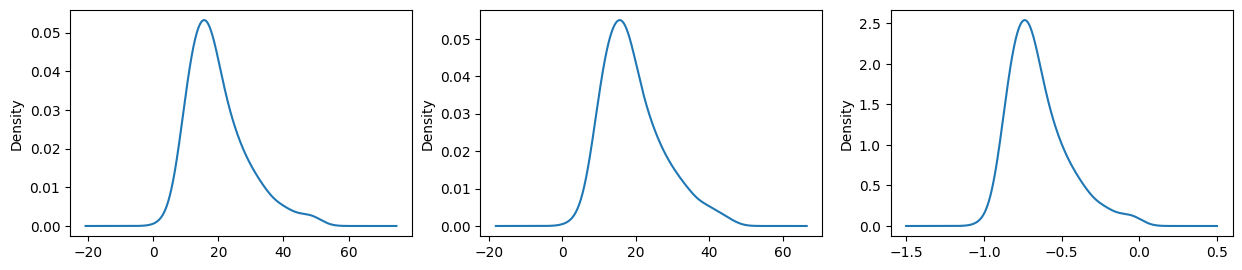

In [81]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df1['total_bill'].plot(kind='kde')
plt.subplot(3,3,2)
df3['total_bill'].plot(kind='kde')
plt.subplot(3,3,3)
df_mm.plot(kind='kde')
plt.show()

In [82]:
print('min max',df_mm.skew())

min max 1.1332130376158194


In [83]:
print('kurtosis for all data is',df1['total_bill'].kurt())
print('kurtosis for all clean data with zscore is',df3['total_bill'].kurt())
print('kurtosis for all clean data with minmax is',df_mm.kurt())

kurtosis for all data is 1.2184840156638854
kurtosis for all clean data with zscore is 0.5355590055930715
kurtosis for all clean data with minmax is 1.2184840156638819


In [84]:
df3['total_bill'].skew()

0.9148510261489988

In [85]:

df1['sqrt']=(df1['total_bill'])**(1/2)
df1['log']=np.log(df1['total_bill'])

In [86]:
df1

,total_bill,tip,sex,smoker,day,time,size,sex LE,sex LE map,LE Day,zscore,sqrt,log
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,2,-0.314066,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,2,-1.061054,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,2,0.137497,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,2,0.437416,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,2,0.539635,4.958831,3.202340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0,1,1.038377,5.387950,3.368330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1,1,0.830568,5.213444,3.302481
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0,1,0.323964,4.761302,3.121042
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0,1,-0.220833,4.221374,2.880321


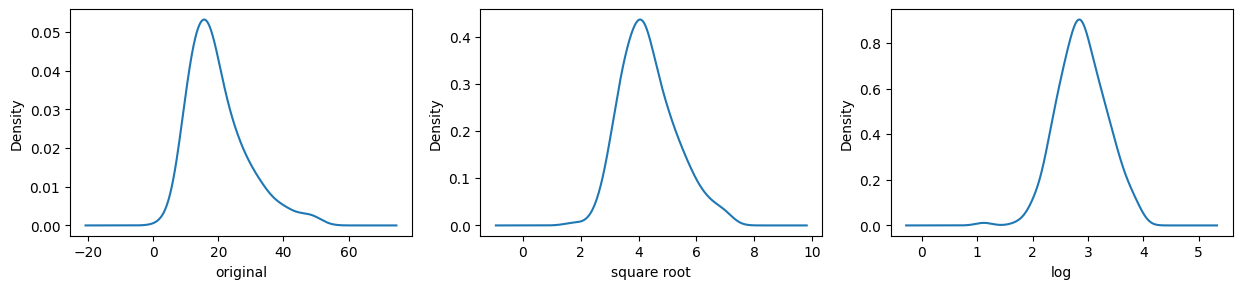

In [87]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df1['total_bill'].plot(kind='kde')
plt.xlabel('original')
plt.subplot(3,3,2)
df1['sqrt'].plot(kind='kde')
plt.xlabel('square root')
plt.subplot(3,3,3)
df1['log'].plot(kind='kde')
plt.xlabel('log')
plt.show()

In [88]:
print('skewness of original data',df1['total_bill'].skew())
print('skewness of root transform data',df1['sqrt'].skew())
print('skewness of log transform data',df1['log'].skew())

skewness of original data 1.1332130376158205
skewness of root transform data 0.5661281592596766
skewness of log transform data -0.11623079290253824


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x=df1.drop(['total_bill'],axis=1)
y=df1['total_bill']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [92]:
pd.crosstab(df1['sex'],df1['day'])

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


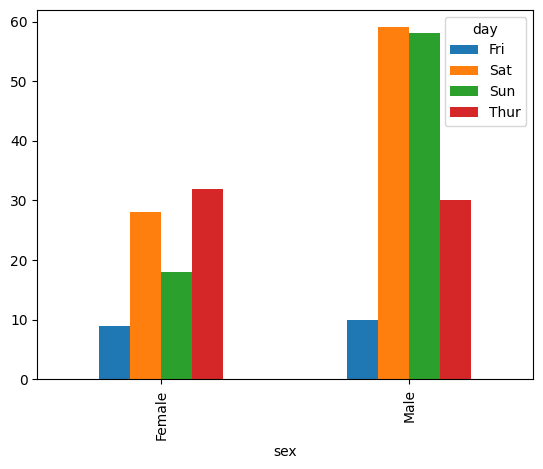

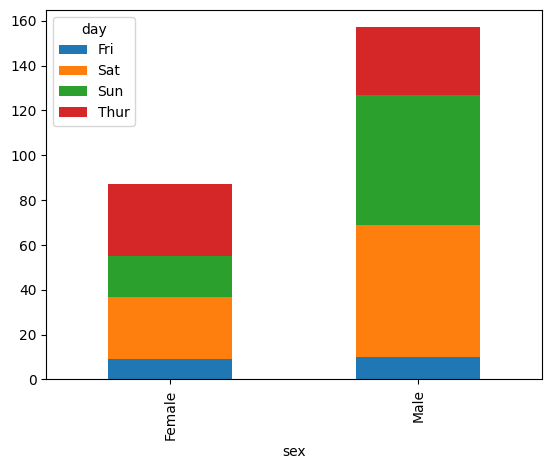

In [93]:
pd.crosstab(df1['sex'],df1['day']).plot(kind='bar')
plt.show()
pd.crosstab(df1['sex'],df1['day']).plot(kind='bar',stacked=True)
plt.show()

In [119]:
features = df1.drop('tip', axis=1)
target = df1['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape


((190, 12), (48, 12))

In [120]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [121]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Accuracy : ', mae(Y_train, pred_train))

  pred_val = models[i].predict(X_val)
  print('Validation Accuracy : ', mae(Y_val, pred_val))
  print()


LinearRegression() : 
Training Accuracy :  0.6608093954848773
Validation Accuracy :  0.7542945250842861

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.02728007923929315
Validation Accuracy :  0.7682166453202566

RandomForestRegressor() : 
Training Accuracy :  0.28431578947

In [122]:
"""Out of all the models RandomForestModel is giving the least value for the mean absolute error this means predictions made by this model are close to the real values as compared to the other model.

Conclusion
The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the tip given to the waiters.

"""

'Out of all the models RandomForestModel is giving the least value for the mean absolute error this means predictions made by this model are close to the real values as compared to the other model.\n\nConclusion\nThe dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the tip given to the waiters.\n\n'